In [71]:
#Lab | Making predictions with logistic regression

In [2]:
#By comparing this 2 queries I see that ALL FILM ids were rent on august 2005

'''
SELECT COUNT(DISTINCT film_id)
FROM film
LEFT JOIN inventory
USING(film_id)
LEFT JOIN rental
USING(inventory_id)
where rental_date BETWEEN '2005-01-01' AND '2005-12-31';'''

'''SELECT COUNT(DISTINCT film_id)
FROM film
LEFT JOIN inventory
USING(film_id)
LEFT JOIN rental
USING(inventory_id)
where rental_date BETWEEN '2005-08-01' AND '2005-08-31';'''

"SELECT COUNT(DISTINCT film_id)\nFROM film\nLEFT JOIN inventory\nUSING(film_id)\nLEFT JOIN rental\nUSING(inventory_id)\nwhere rental_date BETWEEN '2005-08-01' AND '2005-08-31';"

In [25]:
#We start importing libraries
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  
import matplotlib.pyplot as plt
password = getpass.getpass()

········


In [3]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila1'
engine = create_engine(connection_string)
query = '''SELECT inventory_id, store_id, COUNT(rental_id) AS times_rented, rental_duration, rental_rate, length, replacement_cost, rating, MAX(rented_august) as rented_august
FROM
(
SELECT inventory_id, store_id, rental_id, rental_duration, rental_rate, length, replacement_cost, rating, rental_date,
CASE
WHEN rental_date BETWEEN '2005-08-01' AND '2005-08-31' THEN 1
ELSE 0
END AS rented_august
FROM inventory
LEFT JOIN rental
USING(inventory_id)
LEFT JOIN film
USING(film_id)
WHERE rental_date BETWEEN '2005-01-01' AND '2005-12-31') sub1
GROUP BY inventory_id, store_id, rental_duration, rental_rate, length, replacement_cost, rating;'''

data = pd.read_sql_query(query, engine)

In [7]:
#Firstly we look at the database:
data.head()
data.shape
data.dtypes

,inventory_id,store_id,times_rented,rental_duration,rental_rate,length,replacement_cost,rating,rented_august
0,367,1,5,7,2.99,148,21.99,G,1
1,1525,2,5,7,2.99,126,16.99,R,1
2,1711,2,5,7,2.99,156,14.99,G,1
3,2452,1,5,6,0.99,181,21.99,R,1
4,2079,2,5,5,2.99,84,29.99,NC-17,1


(4580, 9)

inventory_id          int64
store_id              int64
times_rented          int64
rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
rating               object
rented_august         int64
dtype: object

In [5]:
#Secondly, we discuss the variables that we need. We think:
   #we should drop inventory_id
   #we should convert store_id into a categorical

data['store_id'] = data['store_id'].astype('object')
data = data.drop('inventory_id',axis=1)

In [9]:
data.head()
data.dtypes

,store_id,times_rented,rental_duration,rental_rate,length,replacement_cost,rating,rented_august
0,1,5,7,2.99,148,21.99,G,1
1,2,5,7,2.99,126,16.99,R,1
2,2,5,7,2.99,156,14.99,G,1
3,1,5,6,0.99,181,21.99,R,1
4,2,5,5,2.99,84,29.99,NC-17,1


store_id             object
times_rented          int64
rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
rating               object
rented_august         int64
dtype: object

In [6]:
#For each categorical variable we will check the different categories inside:
data['store_id'].value_counts()
data['rating'].value_counts()

#we see that there is only 1 variable in the language id variable so we decide to drop it (dropped it in the query)

2    2310
1    2270
Name: store_id, dtype: int64

PG-13    1018
NC-17     944
PG        923
R         904
G         791
Name: rating, dtype: int64

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

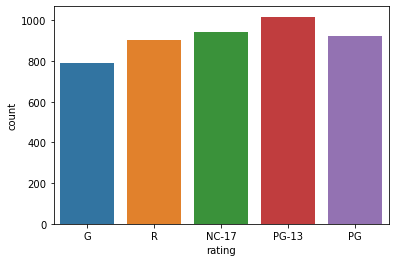

In [7]:
import seaborn as sns
%matplotlib inline
#sns.countplot(data.store_id)
sns.countplot(data.rating)

In [8]:
#We now check the amount of null values
data.isna().sum()

#There are none

store_id            0
times_rented        0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
rented_august       0
dtype: int64

In [13]:
#We now check the numerical figueres:
data.describe()

,times_rented,rental_duration,rental_rate,length,replacement_cost,rented_august
count,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000
mean,3.463319,4.923799,2.951135,114.935590,20.218384,0.966376
std,1.135967,1.406503,1.644880,40.063566,6.077017,0.180280
min,1.000000,3.000000,0.990000,46.000000,9.990000,0.000000
25%,2.000000,4.000000,0.990000,81.000000,14.990000,1.000000
50%,3.000000,5.000000,2.990000,114.000000,20.990000,1.000000
75%,4.000000,6.000000,4.990000,148.000000,25.990000,1.000000
max,5.000000,7.000000,4.990000,185.000000,29.990000,1.000000


In [14]:
#We see that  the release year is always 2006 so we drop this variable (dropped in the query)

In [15]:
import matplotlib.pyplot as plt

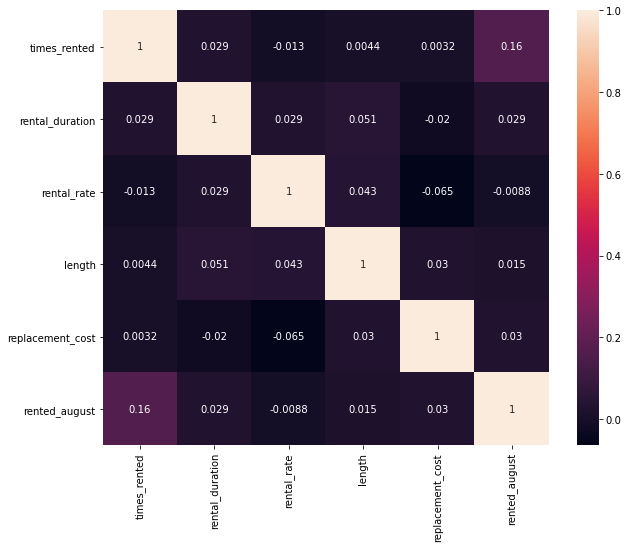

In [26]:
#Now we check the multicolinearity 
corr_matrix=data.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

#We decide to drop the "times_rented" because it is highly correlated to the amount of copies

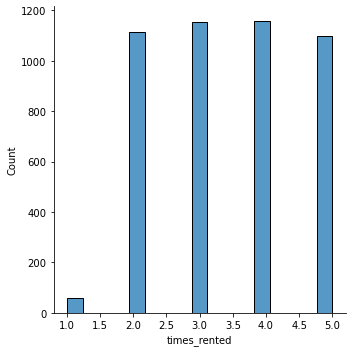

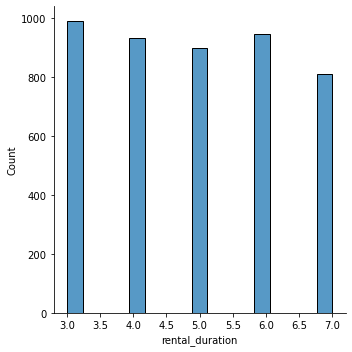

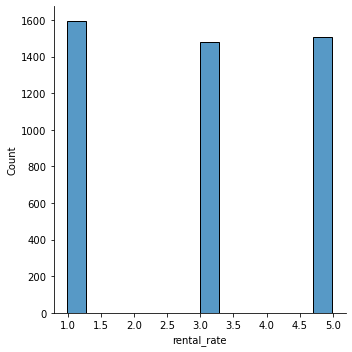

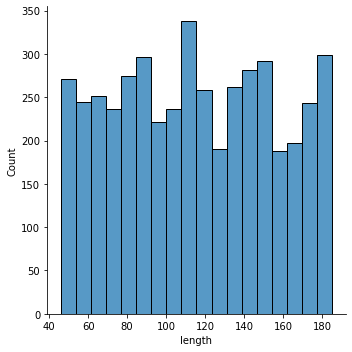

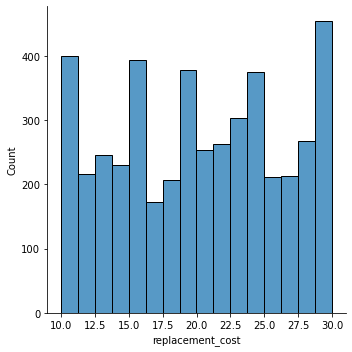

In [17]:
#We biw look at the scale and distribution of values from numeric variables
sns.displot(data['times_rented'])
plt.show()

sns.displot(data['rental_duration'])
plt.show()

sns.displot(data['rental_rate'])
plt.show()

sns.displot(data['length'])
plt.show()

sns.displot(data['replacement_cost'])
plt.show()

In [10]:
#we now normalize:

import numpy as np
from sklearn.preprocessing import MinMaxScaler

X = data.select_dtypes(include = np.number)
X = X.drop('rented_august',axis=1)
# Scaling data
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
#transformer.transform(X) creates a 2 dimension array so you should transform it into a dataframe
x = pd.DataFrame(x_normalized)

In [19]:
cat = data.select_dtypes(include = np.object)
cat

,store_id,rating
0,1,G
1,2,R
2,2,G
3,1,R
4,2,NC-17
...,...,...
4575,2,PG-13
4576,1,R
4577,1,R
4578,2,PG-13


In [11]:
#We now transform our categoric variables to include them in our model
cat = data.select_dtypes(include = np.object)
#Our target is not included in the categories so we do not have to drop it

categorical = pd.get_dummies(cat, columns=['store_id','rating'],drop_first=True)
categorical.head()

,store_id_2,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0,0,0,0,0
1,1,0,0,0,1
2,1,0,0,0,0
3,0,0,0,0,1
4,1,1,0,0,0


In [12]:
#We now try to build X and y
y = data['rented_august']
X = np.concatenate((x, categorical), axis=1)
X

array([[1.  , 1.  , 0.5 , ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 0.5 , ..., 0.  , 0.  , 1.  ],
       [1.  , 1.  , 0.5 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.25, 0.  , 1.  , ..., 0.  , 0.  , 1.  ],
       [0.25, 0.25, 0.  , ..., 0.  , 1.  , 0.  ],
       [0.25, 0.25, 0.  , ..., 0.  , 1.  , 0.  ]])

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [15]:
predictions = classification.predict(X_test)


In [16]:
classification.score(X_test, y_test)


0.9730713245997089

In [17]:
print(y_test.value_counts())
pd.Series(predictions).value_counts()

1    1337
0      37
Name: rented_august, dtype: int64


1    1374
dtype: int64

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[   0,   37],
       [   0, 1337]])

In [20]:
#I try the neighbors method:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X, y)
predictions_clf = clf.predict(X_test)
clf.score(X_test, y_test)

KNeighborsClassifier()

0.9737991266375546

In [21]:
confusion_matrix(y_test, predictions_clf)

array([[   1,   36],
       [   0, 1337]])

In [22]:
pd.Series(y_test).value_counts()

1    1337
0      37
Name: rented_august, dtype: int64

In [23]:
pd.Series(predictions_clf).value_counts()

1    1373
0       1
dtype: int64